Screenshot saved as edge.png


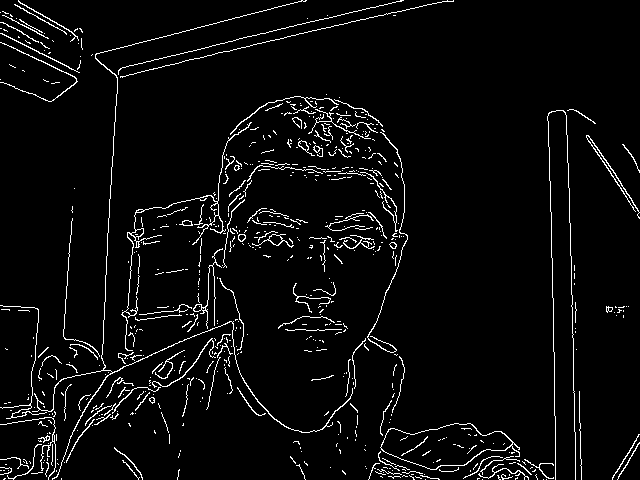

In [1]:
import cv2
from IPython.display import Image, display

cap = cv2.VideoCapture(0) # 讀取攝影鏡頭（webcam）

while True:
    ret, frame = cap.read() # 捕獲一個影格
    if not ret:
        break

    # 使用 Canny 邊緣檢測
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # 轉換為灰階
    gray = cv2.medianBlur(gray, 7) # 執行影像平滑模糊化
    edges = cv2.Canny(gray, 36, 36)  # 使用 Canny 邊緣檢測

    edges_bgr = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR) #顯示圖片是以RGB的形式，所以轉回RGB的形式

    cv2.imshow('Live Video', edges_bgr) # 顯示當前影格


    # 等待按鍵輸入，並檢查是否按下 'a' 鍵儲存當前影像，或 'q' 鍵退出
    key = cv2.waitKey(5) & 0xFF
    if key == ord('a'):  # 按下 'a' 鍵儲存當前影像
        cv2.imwrite('edge.png', edges_bgr)
        print("Screenshot saved as edge.png")
        display(Image(filename='edge.png'))

    if key == ord('q'):  # 按下 'q' 鍵退出
        break

# 釋放攝影鏡頭資源並關閉所有視窗
cap.release()
cv2.destroyAllWindows()
